In [1]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, "/Users/rluger/src/starry-dev/")
import starry
npts = 5000
cmap = plt.get_cmap("plasma")

In [4]:
def PlotFisherMatrix(ydeg=4, udeg=0, vmin=-6, axis=[0, 1, 0], u=None, title=None, **kwargs):
    map = starry.Map(ydeg=ydeg, udeg=udeg)
    map.axis = axis
    if udeg > 0 and u is not None:
        map[1:] = u
    A = map.X(**kwargs)
    F = np.dot(A.T, A)
    Z = np.log10(np.abs(F / np.max(F)))
    Z[Z < vmin] = vmin
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.subplots_adjust(wspace=0.05)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    vmax = 0.1
    im = ax[0].imshow(Z, vmin=vmin, vmax=vmax, cmap="plasma")
    plt.colorbar(im, ax=ax[0])
    for l in range(map.ydeg + 1):
        ax[0].axvline(l ** 2 - 0.5, color="w", ls="--", lw=1)
        ax[0].axhline(l ** 2 - 0.5, color="w", ls="--", lw=1)
    c = cmap((np.diag(Z) - vmin) / (vmax - vmin))
    ax[1].scatter(np.arange(F.shape[0]), np.diag(Z), c=c)
    ax[1].set_ylim(vmin, vmax)
    ax[1].set_xlim(-0.5, F.shape[0] - 0.5)
    ax[1].set_xticks([])
    for l in range(map.ydeg + 1):
        ax[1].axvline(l ** 2 - 0.5, color="k", ls="--", lw=1)
    fig.suptitle(title, fontsize=24)

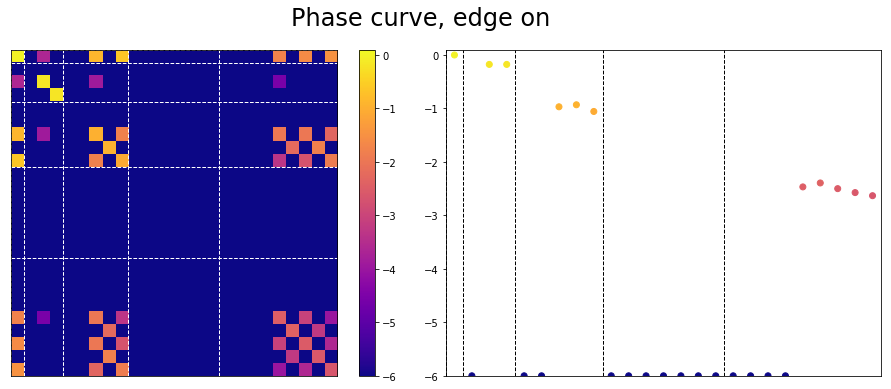

In [13]:
theta = np.linspace(0, 360, npts)
PlotFisherMatrix(theta=theta, title="Phase curve, edge on")

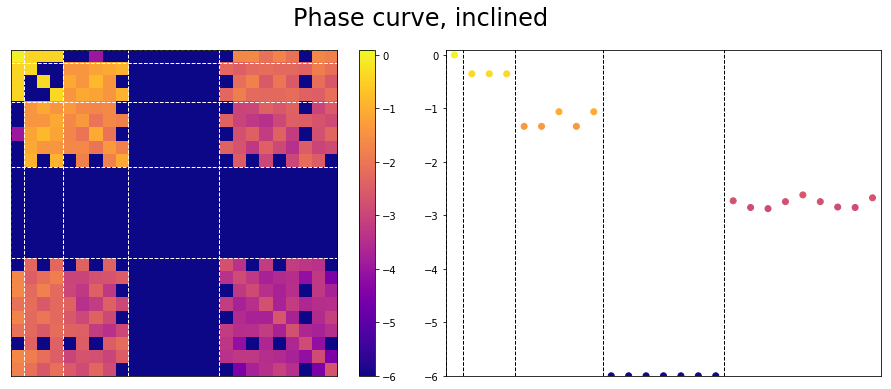

In [14]:
theta = np.linspace(0, 360, npts)
PlotFisherMatrix(theta=theta, axis=[1, 1, 1], title="Phase curve, inclined")

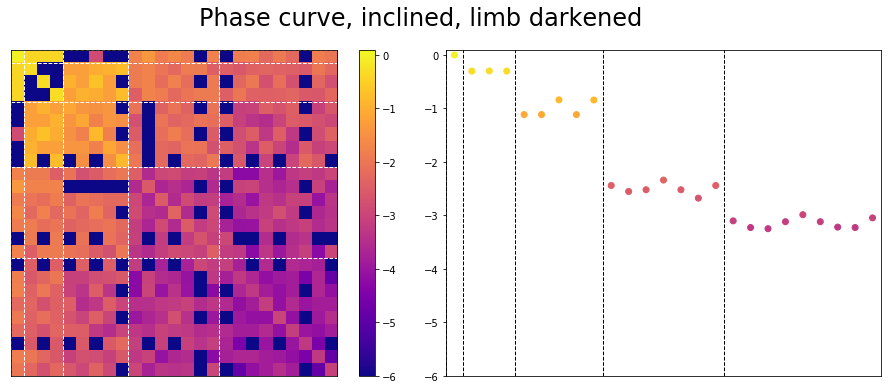

In [7]:
theta = np.linspace(0, 360, npts)
udeg = 2
u = [0.4, 0.26]
PlotFisherMatrix(theta=theta, udeg=udeg, u=u, axis=[1, 1, 1], title="Phase curve, inclined, limb darkened")

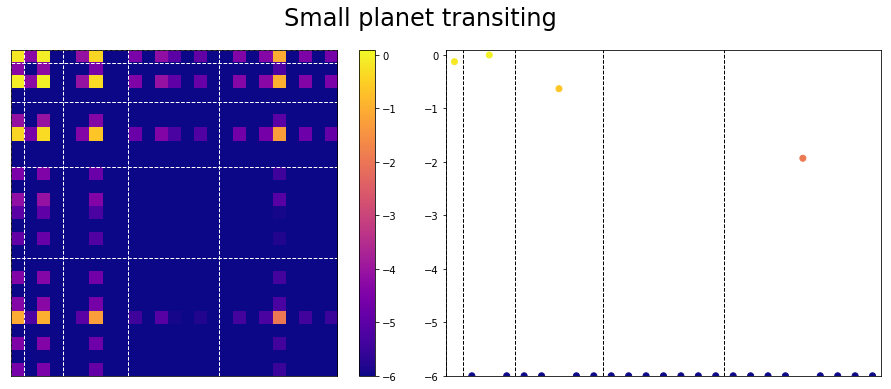

In [8]:
xo = np.linspace(-1.1, 1.1, npts)
yo = 0.5
ro = 0.01
PlotFisherMatrix(xo=xo, yo=yo, ro=ro, title="Small planet transiting")

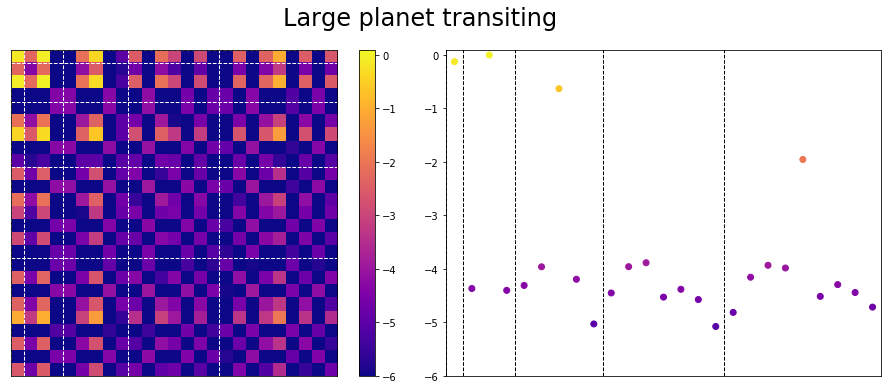

In [9]:
xo = np.linspace(-1.1, 1.1, npts)
yo = 0.5
ro = 0.1
PlotFisherMatrix(xo=xo, yo=yo, ro=ro, title="Large planet transiting")

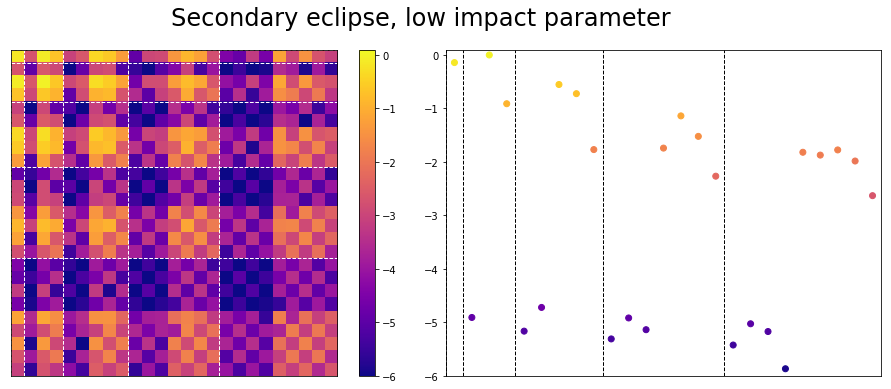

In [10]:
xo = np.linspace(-11, -9, npts)
yo = 0.1
ro = 10
PlotFisherMatrix(xo=xo, yo=yo, ro=ro, title="Secondary eclipse, low impact parameter")

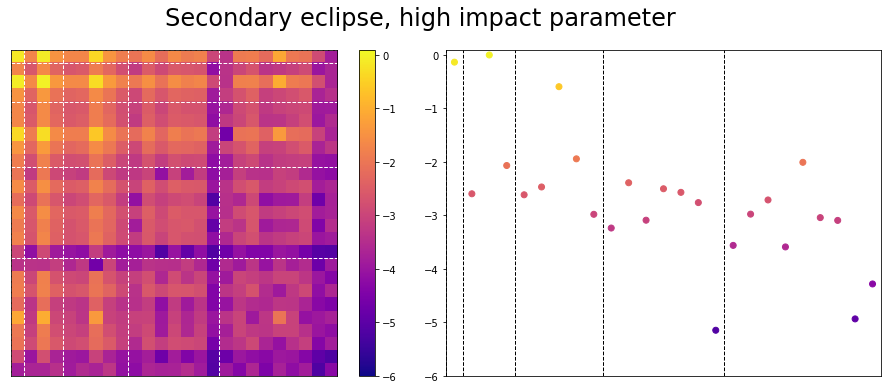

In [11]:
xo = np.linspace(-11, -9, npts)
yo = 5
ro = 10
PlotFisherMatrix(xo=xo, yo=yo, ro=ro, title="Secondary eclipse, high impact parameter")